# Installation

In [ ]:
# run this cell to install pycaret in Google Colab
# !pip install pycaret

In [ ]:
# If you are using Jupyter notebook, you can pip install pycaret using jupyter notebook or command line
# pip install pycaret

In [1]:
from pycaret.utils import version
version()

1.0.0


In [ ]:
# only run this cell if you are using google colab
# from pycaret.utils import enable_colab
# enable_colab()

# 1. Importing Dataset

In [1]:
from pycaret.datasets import get_data
data = get_data('country-data')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# 2. Setting up Environment

In [7]:
from pycaret.clustering import *
clu1 = setup(data, normalize=True, session_id=786,
             ignore_features = ['country'])


Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Original Data,"(167, 10)"
2,Missing Values,False
3,Numeric Features,9
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(167, 9)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


# 3. Train Clustering Model

In [8]:
kmeans = create_model('kmeans')

In [9]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=786, tol=0.0001, verbose=0)


In [14]:
hclust = create_model('hclust')

# 4. Analyze Trained Model

In [11]:
plot_model(kmeans, label=True)

In [15]:
plot_model(hclust, label=True)

In [17]:
plot_model(kmeans, plot = 'tsne', label=True)

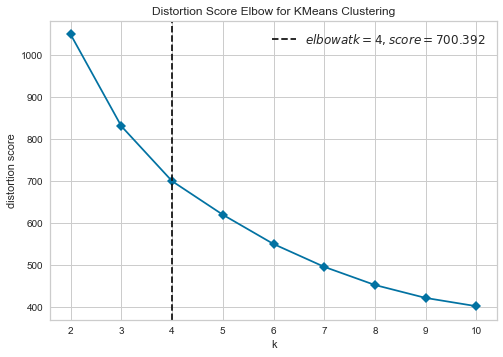

In [18]:
plot_model(kmeans, plot = 'elbow')

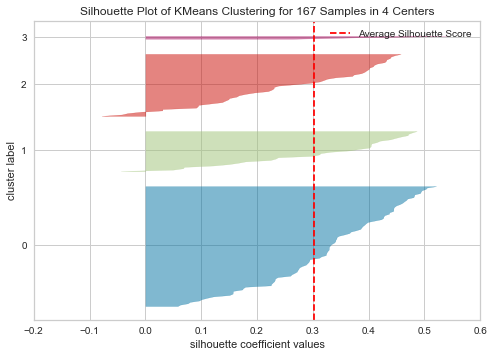

In [19]:
plot_model(kmeans, plot = 'silhouette')

In [21]:
plot_model(kmeans, plot = 'distribution', feature = 'income')

# 5. Assign Labels / Predict on new data

In [22]:
results = assign_model(kmeans)
results.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Cluster 2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Cluster 0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Cluster 0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Cluster 2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Cluster 0


In [23]:
predictions = predict_model(kmeans, data=data)
predictions.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Cluster 2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Cluster 0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Cluster 0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Cluster 2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Cluster 0


# Learning Resources:

- PyCaret Clustering Module : https://www.pycaret.org/clustering
- Clustering Tutorial (Level Beginner) : https://pycaret.org/clu101/
- Clustering in PyCaret (Video Tutorial) : https://www.youtube.com/watch?v=2oxLDir7foQ